## 에지
- 픽셀 값이 급격하게 바뀌는 부분
    - 어두운 영역에서 갑자기 밝아지거나 어두워지는 부분
    - 객체-배경 간 경계 or 객체-객체 간 경계
    - 에지 검출 : 객체 윤곽 검출
<br><br>

### 에지와 미분
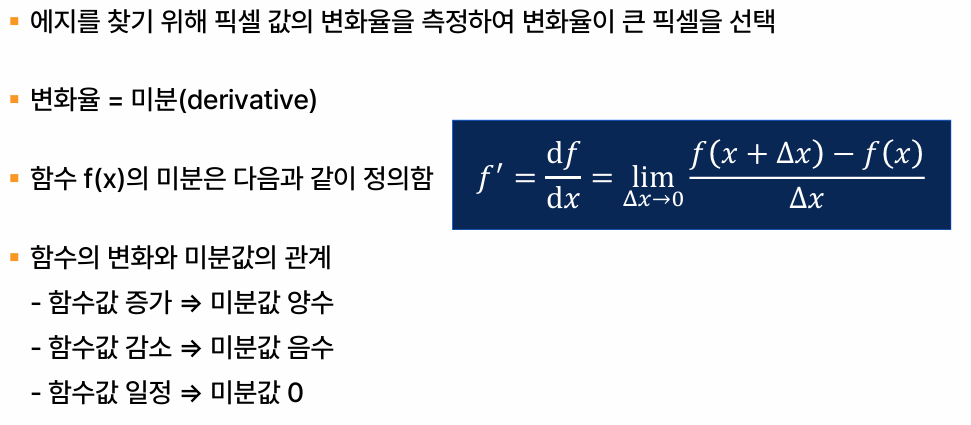
<br><br>

### 미분과 그래디언트
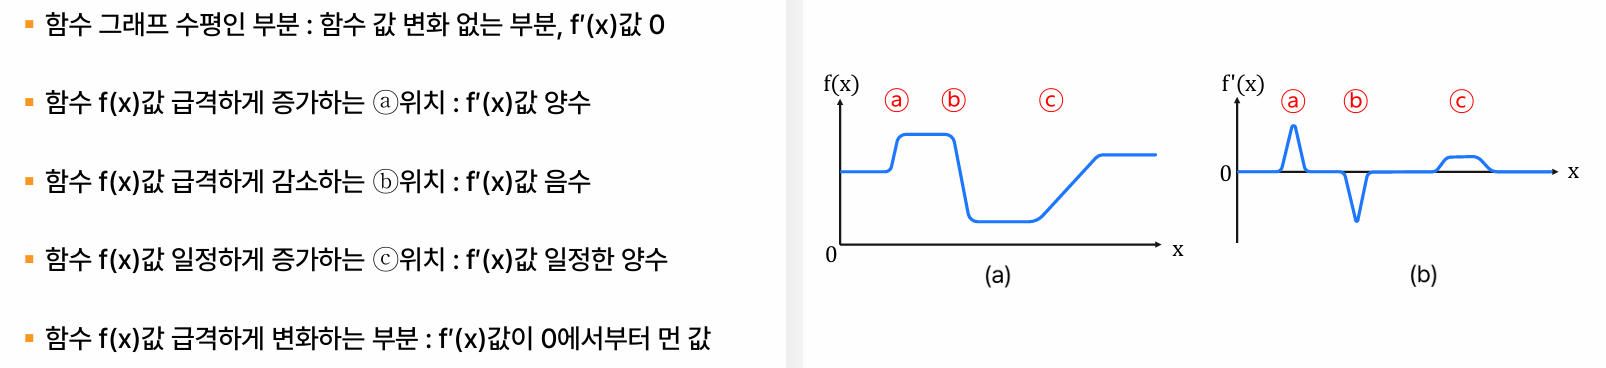
<br><br>

### 마스크 기반 에지 검출
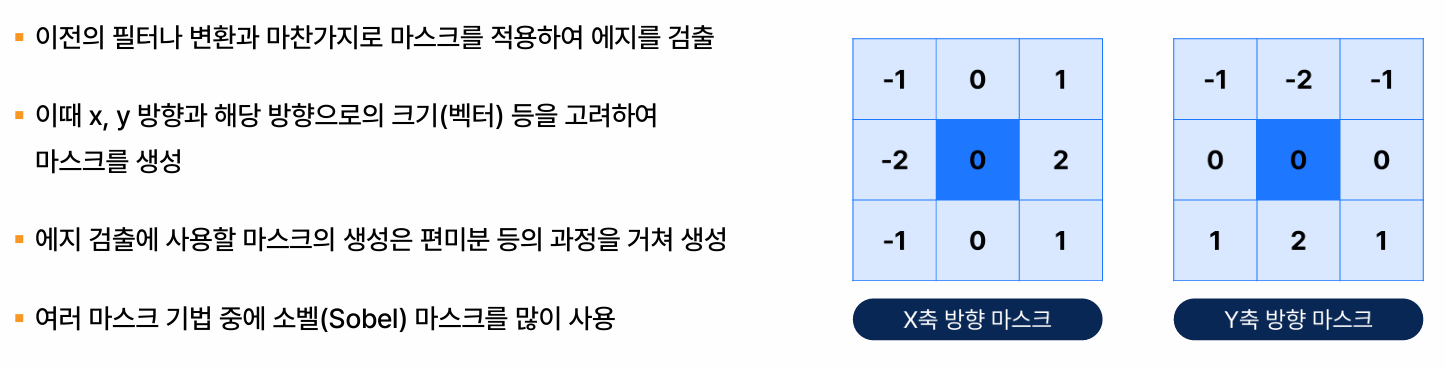
<br><br>

### 소벨 마스크 미분 검출
- cv2.Sobel(src, ddepth, dx, dy, dst = None, ksize = None, scale = None, delta = None, borderType = None)
    - src : 입력 영상
    - ddepth : 출력 영상 데이터 타입
        - -1 입력 : 입력 영상과 같은 데이터 타입 사용
    - dx : x 방향 미분 차수 -> 1차 or 2차 미분 결정
    - dy : y 방향 미분 차수
    - dst : 출력 영상
    - ksize : 커널 크기
    - scale : 연산 결과에 추가적으로 곱할 값(기본값=1)
    - delta : 연산 결과에 추가적으로 더할 값(기본값=0)
    - borderType : 가장자리 픽셀 확장 방식(기본=cv2.BORDER_DEFAULT)


In [3]:
import cv2
import numpy as np

src=cv2.imread('./img/apple.png',cv2.IMREAD_GRAYSCALE)
dx=cv2.Sobel(src,-1,1,0,delta=128)
dy=cv2.Sobel(src,-1,0,1,delta=128)

cv2.imshow('src',src)
cv2.imshow('dx',dx)
cv2.imshow('dy',dy)

cv2.waitKey()
cv2.destroyAllWindows()

# 에지 검출
### 그래디언트를 적용한 에지 검출
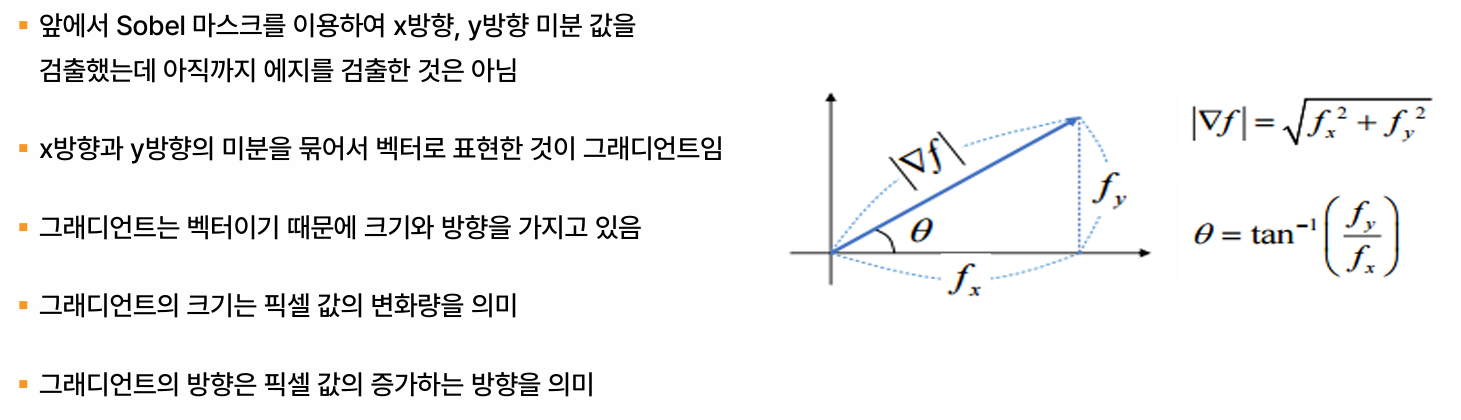
<br><br>

### 2D 벡터 크기 계산 : cv2.magnitude()
- 소벨 필터로 구한 x방향, y방향 미분값 입력하여 벡터 크기 계산
- 소벨 필터 에지 검출 수행
- cv2.magnitude(x, y, magnitude = None)
    - x : 2D 벡터 x 좌표 행렬 (실수형)
    - y : 2D 벡터 y 좌표 행혈 (실수형, x와 같은 크기)
    - magnitude : 2D 벡터 크기 행렬

In [5]:
import cv2
import numpy as np
src = cv2.imread('./img/beach.jpg', cv2.IMREAD_GRAYSCALE)
dx = cv2.Sobel (src, cv2.CV_32F, 1, 0)
dy = cv2.Sobel (src, cv2.CV_32F, 0, 1)

mag = cv2.magnitude(dx, dy)
mag = np.clip(mag, 0, 255).astype(np.uint8)
dst = np.zeros(src.shape[:2], np. uint8)
dst[mag>120] = 255

cv2.imshow('src', src)
cv2.imshow('mag', mag)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 캐니 에지 검출
- 소벨 에지 검출 방법 단점 해결
- 좋은 에지 검출기 조건
    1. 정확한 검출 : 에지 검출 못하거나 부정확성 확률 최소화
    2. 정확한 위치 : 실제 에지 중심 찾기
    3. 단일 에지 : 하나의 에지 -> 하나의 점
- 특징
    - 에지 검출전 노이즈 제거 수행
    - 그래디언트 크기,방향 모두 고려
- 캐니 에지 검출 연산 프로세스
    1. 노이즈 제거
    2. 그래디언트 계산
    3. 비최대 억제
    4. 이중 임계값 처리
    5. 에지 연결
- cv2.Canny(img, threshold1, threshold2, edges = None, apertureSize = None, L2gradient = None)
    - img : 입력 영상
    - threshold1 : 하단 임계값
    - threshold2 : 상단 임계값
    - edges : 에지 영상
    - apertureSize : 소벨 연산 위한 커널 크기(기본값=3)
    - L2gradiendt : True - L2 norm 사용 /  False - L1 norm 사용

In [7]:
import cv2

src=cv2.imread('./img/building.png',cv2.IMREAD_GRAYSCALE)
dst=cv2.Canny(src,50,150)

cv2.imshow('src',src)
cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()

# Hough 변환
### 허프 변환 직선 검출
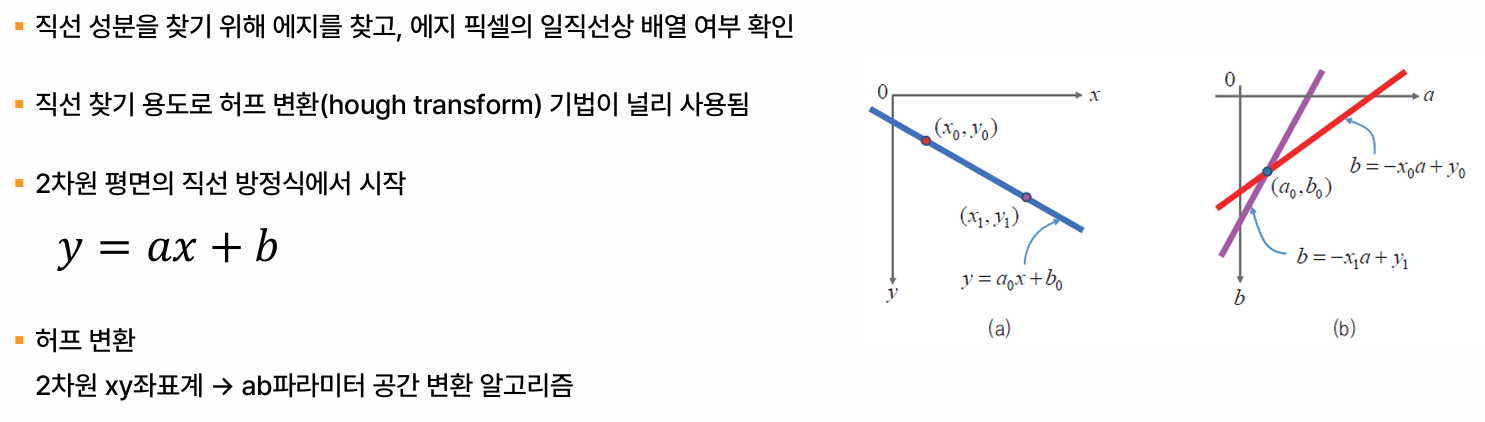
<br><br>

### 허프 변환 직선 검출 - cv2.HoughLines
- 캐니 함수로 윤곽선 검출한 값을 함수에 입력값으로 설정하면 직선 파라미터 정보를 담고있는 결과값 반환
- cv2.HoughLines(img, rho, theta, threshold, lines = None, srn = None, stn = None, min_theta = None, max_theta = None)
    - img : 입력 에지 영상
    - rho : 축적 배열에서 로우값 간격 -> 1.0 : 1픽셀 간격
    - theta : 축적 배열에서 세타값 간격 -> 라디안
    - threshold : 축적 배열에서 직선으로 판단할 임계값
    - lines : 직선 파라미터(rho, theta) 정보 담은 np.ndarray
    - srn, stn : 멀티 스케일 허프 변환에서 로우 해상도, 세타 해상도를 나누는 값(기본값=0 -> 일반 허프 변환 수행)
    - min_theta, max_theta : 검출할 선분의 최소,최대 theta
<br><br>

### 확률적 허프 변환에 의한 선분 검출 - cv2.HoughLinesP
- 직선의 시작과  끝 정보 제공
- cv2.HoughLinesP(img, rho, theta, threshold, lines = None, minLineLength = None, maxLineGap = None)
    - img : 입력 에지 영상
    - rho : 축적 배열에서 로우값 간격 -> 1.0 : 1픽셀 간격
    - theta : 축적 배열에서 세타값 간격 -> 라디안
    - threshold : 축적 배열에서 직선으로 판단할 임계값
    - lines : 선분 시작,끝 좌표(x1, y1, x2, y2) 정보 담은 np.ndarray
    - minLineLength : 검출할 선분의 최소 길이
    - maxLineGap : 직선으로 간주할 최대 에지 점간격

In [ ]:
import cv2
import numpy as np
src= cv2.imread('./img/building.png', cv2.IMREAD_GRAYSCALE)
edge = cv2.Canny(src, 50, 150)
lines = cv2.HoughLinesP(edge, 1, np.pi / 180, threshold=80, minLineLength=50, maxLineGap=10)
dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for i in range(lines.shape[0]):
        pt1 = (lines[i][0][0], lines[i][0][1])
        pt2 = (lines[i][0][2], lines[i][0][3])
        cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

# 원 검출
### 허프 변환 원 검출
- 허프 변환 응용하여 원 검출
<br><br>

### Hough gradient method
- 원에서 검출된 에지의 원주 점의 정보 이용
- 원 에지 픽셀에서 그래디언트 계산하고 그래디언트 크기 방향으로 직선 그리며너서 값 누적
- 그래디언트 크기 : 원 중심으로 모임 -> 원 중심 검출
- cv2.HoughCircles (img, method, dp, minDist, circles=None, param1=None, param2=None, minRadius=None, maxRadius=None)
    - img : 입력 영상(에지 영상 아닌 일반 영상)
    - method : OpenCV 4.2 이하 버전 - cv2.HOUGH_GRADIENT만 지정 가능
    - dp : 입력 영상과 축적 배열 크기 비율
        - 1 : 동일 크기
        - 2 : 축적 배열 가로, 세로 크기 = 입력 영상의 절반
    - minDist : 검출된 원 중심점들의 최소 거리
    - circles : (cx, cy, r) 정보 담은 np.ndarray -> shape : (1, N, 3) / dtype : np.float32
    - param1 : Canny 에지 검출기의 높은 임계값
    - param2 : 축적 배열에서 원 검출 위한 임계값
    - minRadius, maxRadius : 검출할 원의 최소, 최대 반지름


In [20]:
import cv2
import numpy as np

src = cv2.imread('./img/dial.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur (src, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,
                           cv2.HOUGH_GRADIENT,
                           1,
                           50,
                           param1 = 120,
                           param2 = 50,
                           minRadius = 10,
                           maxRadius = 120)

circles = np. uint16 (np.around (circles))
for i in circles [0,:]:
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)

cv2.imshow('src', src)
cv2.imshow('detected circles', cimg)
cv2.waitKey()
cv2.destroyAllWindows()

### 템플릿 매칭
- 입력 영상 전체 영역에 대해 이동하면서 가장 비슷한 위치를 수치적으로 찾아내는 방식
    - 기준영상에서 부분영상 위치 찾을 때 템플릿 매칭 기법 사용
    - 템플릿 : 작은 크기 영상

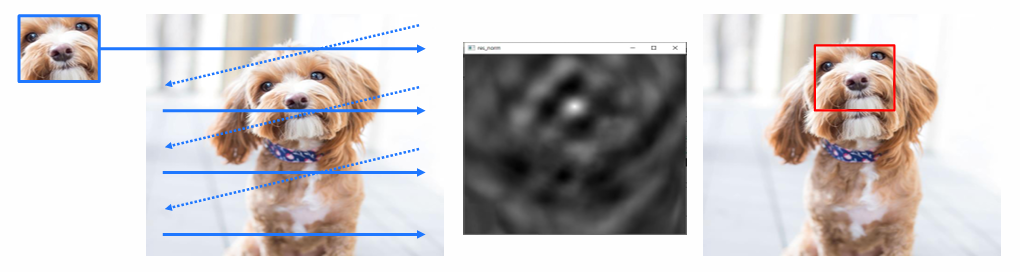

- 과정
    1. 부분 영상을 템플릿으로 사용하여 템플릿 매칭 수행
    2. 템플릿 영상 - 기준 엿앙 유사도 또는 비유사도 계산
    3. 기준 영상의 모든 위치에서 템플릿 영상과의 유사도 계산
    4. 결과 : 그레이스케일 영상 형태
    5. 가장 밝은 픽셀 위치 : 템플릿 영상과 가장 유사한 부분
- cv2.matchTemplate(image, templ, method, result = None, mask = None)
    - image : 입력 영상 (8비트 or 32비트)
    - templ : 출력 영상 데이터 타입 -> -1 : 입력 영상과 같은 데이터 타입 사용
    - method : 비교방법 -> cv2.TM_으로 시작하는 플래그 지정(6가지)
    - result : 비교 결과 행렬 -> np.ndarray, dtype = np.float32
    - mask : 찾고자 하는 템플릿 마스크 영상 (templ과 같은 크기, 타입)
    - method : 유사도 or 비유사도 계산 지정
    - cv2.TM_SQDIFF : 유사 - 0 / 비유사 - 255
    - cv2.TM_CCOEFF_NORMED : 가장 좋은 결과 제공(연산량 多)

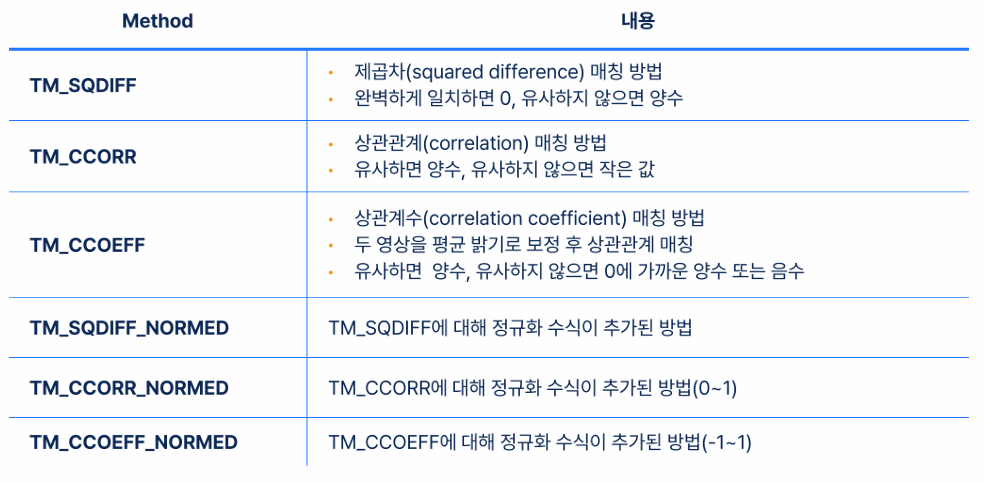
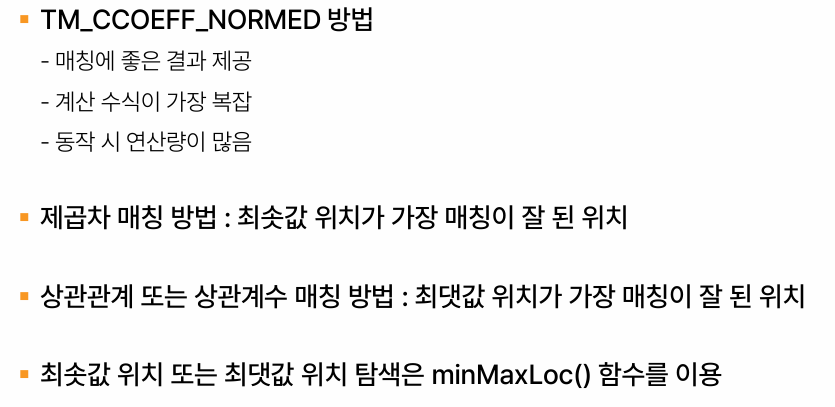

In [3]:
import cv2, sys
import numpy as np

src=cv2.imread('./img/dog.jpg', cv2.IMREAD_GRAYSCALE)
temp=cv2.imread('./img/dog_template.jpg', cv2.IMREAD_GRAYSCALE)
noise=np.zeros(src.shape, np.int32)

cv2.randn(noise,50,10)
res=cv2.matchTemplate(src,temp,cv2.TM_CCOEFF_NORMED)
res_norm=cv2.normalize(res,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U)
_,maxv,_,maxloc=cv2.minMaxLoc(res)

print(f'max : {maxv}')
print(f'maxloc : {maxloc}')

th,tw=temp.shape[:2]
dst=cv2.cvtColor(src,cv2.COLOR_GRAY2BGR)
cv2.rectangle(dst,maxloc,(maxloc[0]+tw,maxloc[1]+th),(0,0,255),2)

cv2.imshow('template',temp)
cv2.imshow('res_norm',res_norm)
cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()

max : 0.9999838471412659
maxloc : (236, 138)


### 케스케이드 분류기와 얼굴 검출
- OpenCV의 얼굴 검출 기능 : 캐스케이드 분류기 알고리즘 기반
    - 비올라와 존스가 개발한 객체 검출 알고리즘으로 다양한 객체 검출 가능
    - 특히 얼굴 검출시 속도와 정확도가 좋음
    - 본 알고리즘은 영상을 24×24 크기로 정규화
    - 유사-하르 필터(Haar-like filter) 집합에서 특징 정보 추출

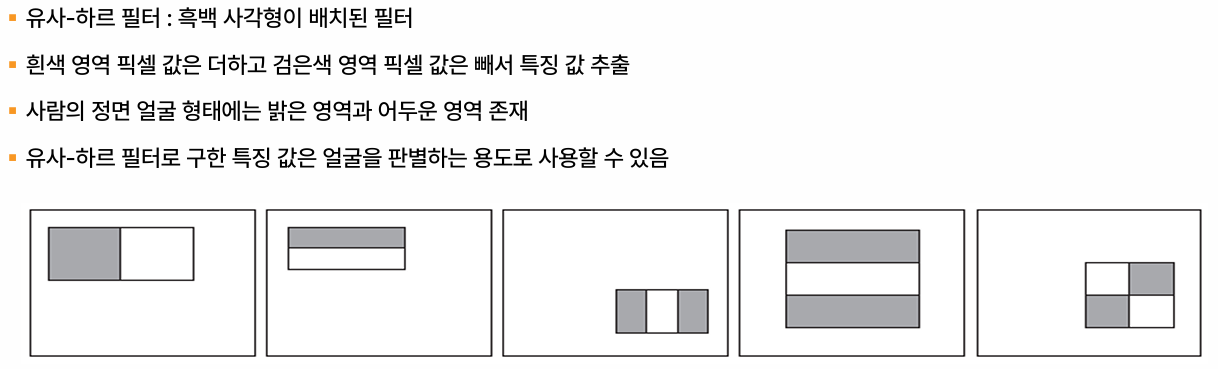

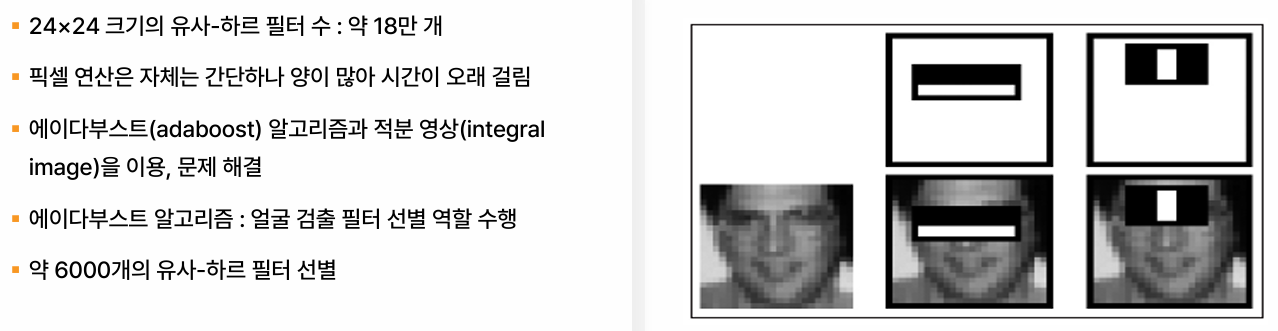

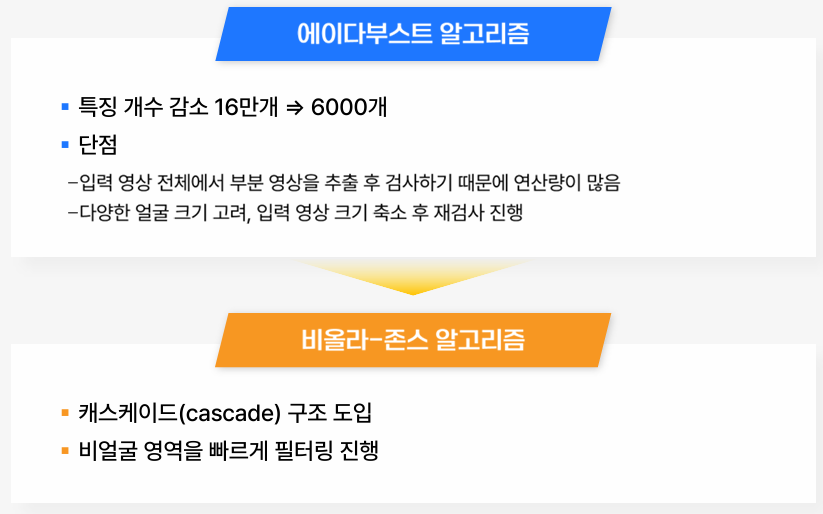

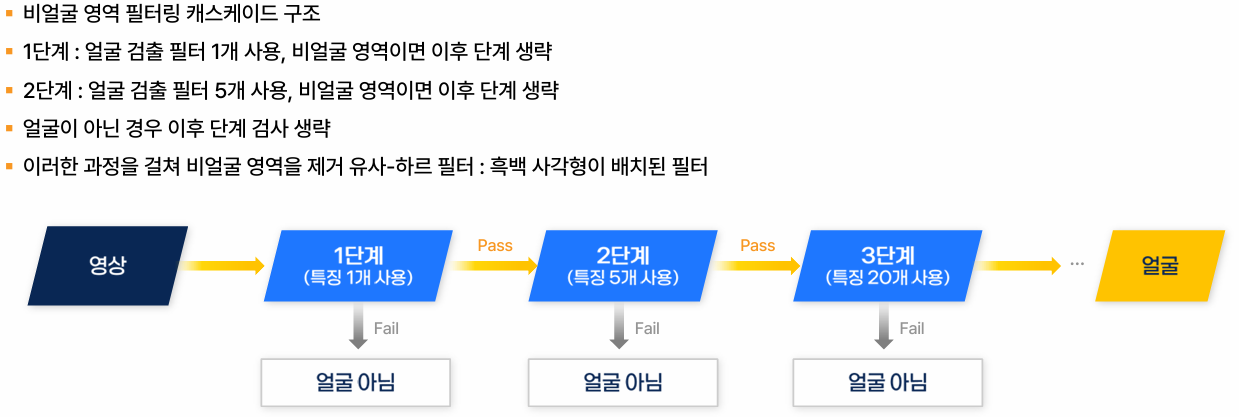

- cv2.CascadeClassifier(filename)
    - filename : xml 파일 이름
        - 미리 학습된 정보 불러와서 내가 찾고자 하는 객체 검출하는 기능 제공
        - OpenCV -> 미리 훈련된 얼굴 검출, 눈 검출 등 위한 분류기 XML 파일 제공
        - OpenCV 깃허브 사이트 내 캐스케이드 학슴된 특징 자료 다운
- cv2.CascadeClassifier.detectMultiScale(image, scaleFactor = None, minNeighbors = None, flags = None, minSize = None, maxSize = None)
    - image : 입력 영상(cv2.CV_8U)
    - scaleFactor : 영상 축소 비율 (기본값 = 1.1)
    - minNeighbors : 얼마나 많은 이웃 사각형 검출되어야 최종 검출 영역으로 설정할지 지정
    - flags : 사용 x
    - minSize : 최소 객체 크기 (w,h)
    - maxSize : 최대 객체 크기 (w,h)

In [4]:
import cv2
src=cv2.imread('./img/people.jpg')
c_xml='./img/haarcascade_frontalface_alt2.xml'

classifier=cv2.CascadeClassifier(c_xml)
faces=classifier.detectMultiScale(src)

for (x,y,w,h) in faces:
    cv2.rectangle(src,(x,y,w,h),(255,0,255),2)

cv2.imshow('src',src)
cv2.waitKey()
cv2.destroyAllWindows()

# HOG 알고리즘과 보행자 검출
### HOG - Histogram of Oriented Gradients
- 영상의 지역적 그래디언트 방향 정보를 히스토그램으로 표현해서 영상의 형태를 표현하는 방법
- HOG와 SVM 머신러닝을 결합하여 정형화된 객체를 검출하는 알고리즘
- 이를 기반으로 입력 영상에서 보행자 위치를 검출
<br><br> 
### HOG 알고리즘과 보행자 검출
- 64×128 크기 영상 사용
- HOG 알고리즘: 그래디언트 계산(크기, 방향 성분)
- 입력 영상을 8x8 크기 단위로 분할, 셀(cell)이라고 부름
- 셀에서 그래디언트 방향 성분 히스토그램(20단위로 구분)을 구함
- 인접 네 개 셀을 합쳐서 블록(block)이라고 정의

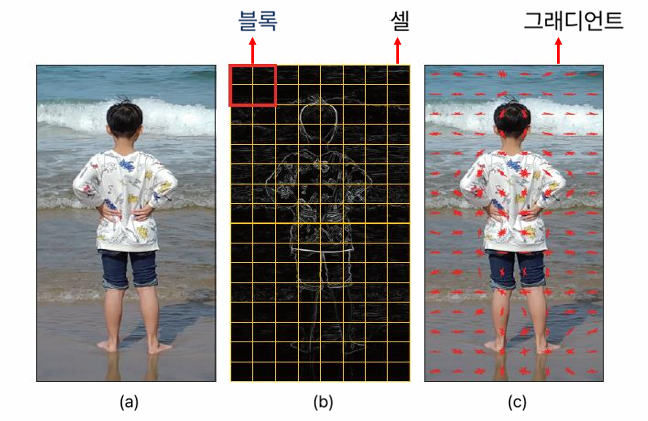

- HOG 기술자 객체 생성 및 보행자 검출을 위해 학습된 분류기 계수 불러오기
    - cv2.HOGDescriptor_getDefaultPeopleDetector()
- SVM 분류기 계수 등록하기
    - cv2.HOGDescriptor.setSVMDetector(svmdetector)
- HOG 멀티스케일 객체 검출 함수
    - cv2.HOGDescriptor.detectMultiScale
- cv2.HOGDescriptor.detectMultiScale(img, hitThreshold = None, winStride = None, padding = None, scale = None, finalThreshold = None, useMeanshiftGrouping = None)
    - img : 입력 영상. cv2.CV_8UC1 또는 cv2.CV_8UC3.
    - scale : 검색 윈도우 크기 확대 비율 (기본값 = 1.05)
    - finalThreshold : 검출 결정을 위한 임계값
    - hitThreshold : 특징 벡터와 SVM 분류 평면까지의 거리에 대한 임계값
    - useMeanshiftGrouping : 겹쳐진 검색 윈도우를 합치는 방법 지정 플래그
    - winStride : 셀 윈도우 이동 크기 -> (0, 0) 지정 시 셀 크기와 같게 설정
    - foundLocations : (출력) 검출된 사각형 영역 정보
    - padding : 패딩 크기
    - foundWeights : (출력) 검출된 사각형 영역에 대한 신뢰도


In [7]:
import cv2, sys
import random
cap = cv2.VideoCapture('./img/vtest.avi')
hog = cv2.HOGDescriptor()
hog.setSVMDetector (cv2.HOGDescriptor_getDefaultPeopleDetector())

while True:
    ret, frame = cap.read()

    if not ret:
        break

    detected,_= hog.detectMultiScale(frame)

    for (x, y, w, h) in detected:
        c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv2.rectangle(frame, (x, y, w, h), c, 3)
        cv2.imshow('frame', frame)
    if cv2.waitKey(10) == 27:
        break
cv2.destroyAllWindows()